In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
train_data = pd.read_csv('mnist_train.csv', header=None)
test_data = pd.read_csv('mnist_test.csv', header=None)

print("Training Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Training Data Shape: (60000, 785)
Test Data Shape: (10000, 785)


In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = train_data.iloc[:, 1:]
y_train = train_data.iloc[:, 0]
X_test  = test_data.iloc[:,  1:]
y_test = test_data.iloc[:,  0]

X_train = X_train.values.reshape(-1,28,28,1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
X_test = X_test.values.reshape(-1,28,28,1).astype('float32') / 255.0
y_test  = to_categorical(y_test, num_classes=10)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test: ", X_test.shape,  "y_test: ",  y_test.shape)

X_train: (60000, 28, 28, 1) y_train: (60000, 10)
X_test:  (10000, 28, 28, 1) y_test:  (10000, 10)


In [8]:
model = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(10,activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2704)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          27,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,210 (106.29 KB)

 Trainable params: 27,210 (106.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7946 - loss: 0.8685 - val_accuracy: 0.9505 - val_loss: 0.1891
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9423 - loss: 0.2024 - val_accuracy: 0.9695 - val_loss: 0.1192
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9629 - loss: 0.1356 - val_accuracy: 0.9753 - val_loss: 0.0939
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9719 - loss: 0.1016 - val_accuracy: 0.9803 - val_loss: 0.0755
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9764 - loss: 0.0844 - val_accuracy: 0.9802 - val_loss: 0.0703


In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.9722 - loss: 0.0865
Test Accuracy: 0.9769


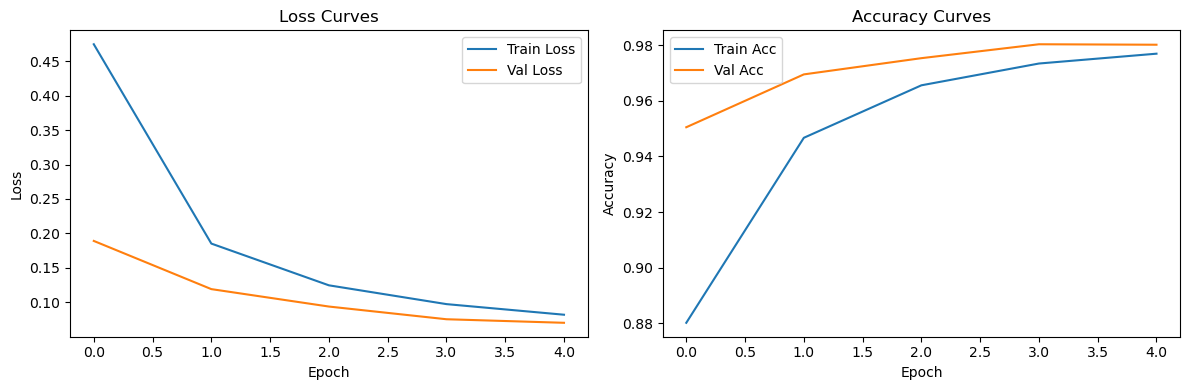

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step


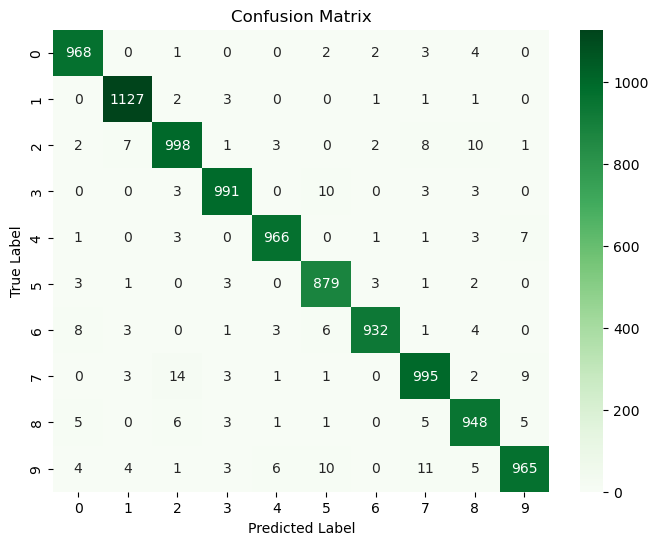

              precision    recall  f1-score   support

           0     0.9768    0.9878    0.9822       980
           1     0.9843    0.9930    0.9886      1135
           2     0.9708    0.9671    0.9689      1032
           3     0.9831    0.9812    0.9822      1010
           4     0.9857    0.9837    0.9847       982
           5     0.9670    0.9854    0.9761       892
           6     0.9904    0.9729    0.9816       958
           7     0.9670    0.9679    0.9674      1028
           8     0.9654    0.9733    0.9693       974
           9     0.9777    0.9564    0.9669      1009

    accuracy                         0.9769     10000
   macro avg     0.9768    0.9769    0.9768     10000
weighted avg     0.9769    0.9769    0.9769     10000



In [12]:
y_pred = model.predict(X_test).argmax(axis=1)
y_true = test_data.iloc[:, 0].values

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_true, y_pred, digits=4))

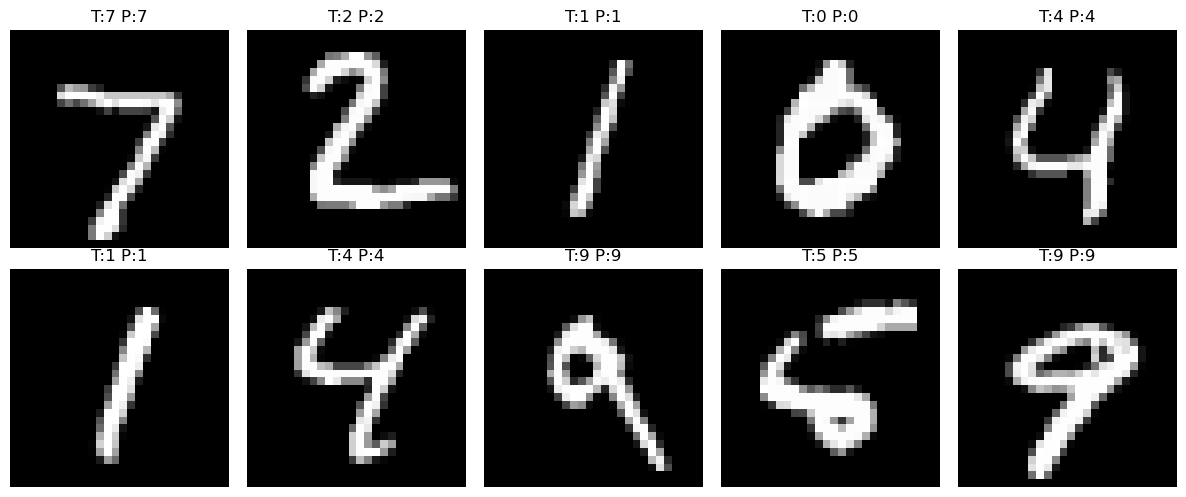

In [14]:
fig, axes = plt.subplots(2,5,figsize=(12,5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_test[i].reshape(28,28), cmap='gray')
    axes[i].set_title(f"T:{y_true[i]} P:{y_pred[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()